# What conditions are comfortable for people?

This notebook is designed to be a practical investigation of the what conditions influence the comfort of occupants in the various contexts that were tested in the ASHRAE Thermal Comfort Database II studies.

We will go through and investigate how temperature, humidity, air movement, and other factors influence comfort. In this analysis, we will use a subset of the larger data set that can be found on the project website: http://www.comfortdatabase.com/

We will use the **Seaborn** library for this task: https://seaborn.pydata.org/


In [0]:
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [36]:
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/EDX Data Science for the Built Environment/4 - Operations - Statistics and Visualization/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
ieq_data = pd.read_csv("ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

In [38]:
ieq_data.head()

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
2233,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2234,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-1.0,0.64,1.0,25.2,64.0,0.1,-1.0
2235,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-2.0,0.64,1.0,25.2,64.0,0.1,-2.0
2236,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2237,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.0,25.2,64.0,0.1,0.0


In [39]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
Publication (Citation)             43448 non-null object
Year                               43448 non-null float64
Season                             43448 non-null object
Climate                            43448 non-null object
City                               43448 non-null object
Country                            43448 non-null object
Building type                      43448 non-null object
Cooling startegy_building level    43448 non-null object
Sex                                43448 non-null object
Thermal sensation                  43448 non-null float64
Clo                                43448 non-null float64
Met                                43448 non-null float64
Air temperature (C)                43448 non-null float64
Relative humidity (%)              43448 non-null float64
Air velocity (m/s)                 43448 non-null float64
ThermalSensation_rounded 

# Are the conditions that influence people's comfort?

Is it air temperature, humidity, air movement? Other stuff?

Let's use box plots to investigate!

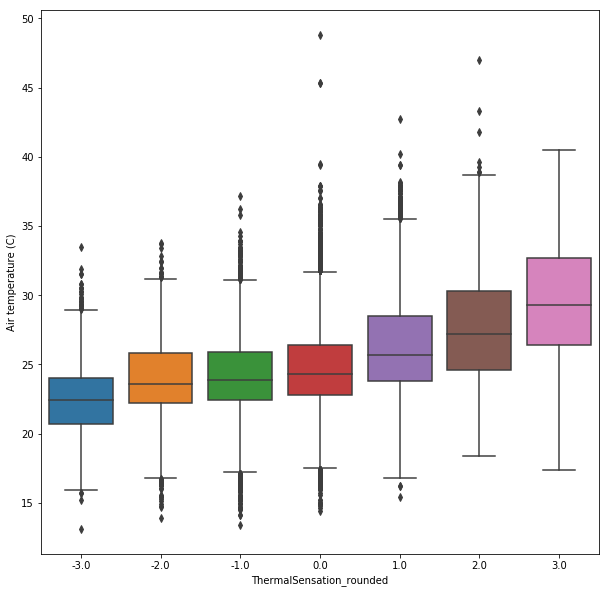

In [40]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", data=ieq_data)

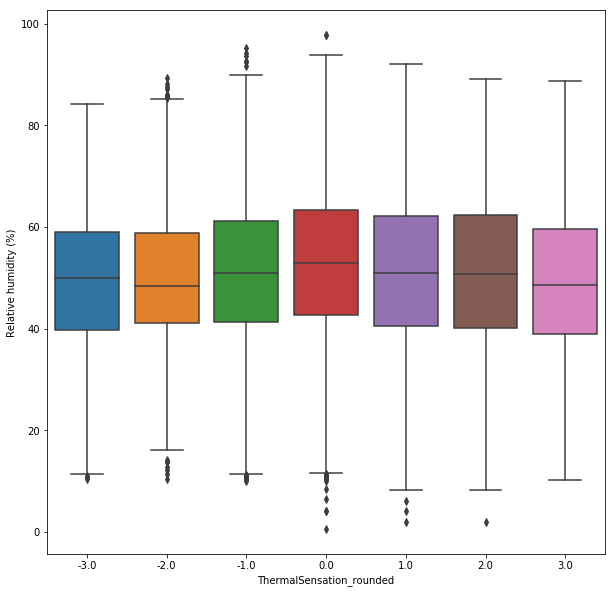

In [41]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Relative humidity (%)", data=ieq_data)

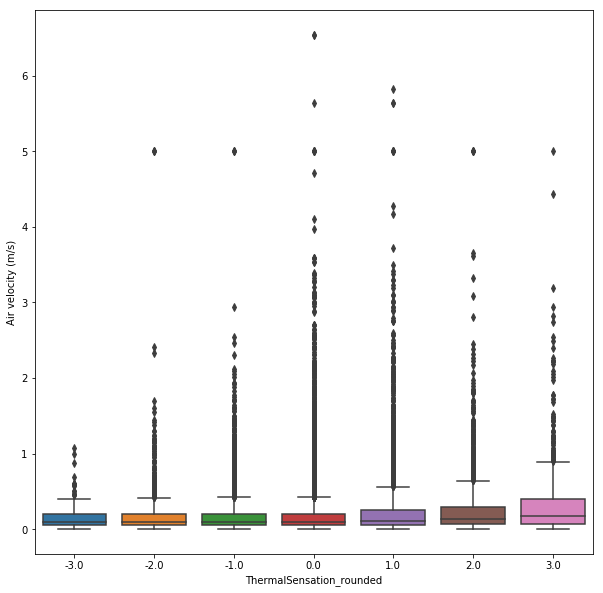

In [42]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air velocity (m/s)", data=ieq_data)

# How about personal attributes? Do they have an impact?

Let's use box plots, but use the `hue=` attribute to add another dimension to the analysis.

In [0]:
ieq_data.info()

In [0]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", hue="Sex", data=ieq_data)

## Using the `.round()` function

Let's use the `.round()` function to create a more categorical set of options for metabolism and clothing levels

In [0]:
ieq_data["Met_rounded"]= ieq_data["Met"].round(0)
ieq_data["Clo_rounded"]= ieq_data["Clo"].round(0)

In [0]:
ieq_data.info()

In [0]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", hue="Met_rounded", data=ieq_data)

In [0]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", hue="Clo_rounded", data=ieq_data)

# How does the type of building or its systems influence people's comfort?

Let's use horizontal box plots to get a sense of the attributes of the built environment and how they influence comfort.

In [0]:
ieq_data.info()

In [0]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(y="Building type", x="Thermal sensation",
             palette="RdBu_r",
            data=ieq_data[["Building type","Thermal sensation","Sex"]].dropna())

sns.despine(offset=10, trim=True)

In [0]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(y="Cooling startegy_building level", x="Thermal sensation",
             palette="RdBu_r",
            data=ieq_data[["Cooling startegy_building level","Thermal sensation"]].dropna())

sns.despine(offset=10, trim=True)

In [0]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(y="Season", x="Thermal sensation",
             palette="RdBu_r",
            data=ieq_data[["Season","Thermal sensation"]].dropna())

sns.despine(offset=10, trim=True)

# How does the country someone is from influence how they perceive comfort?

Let's use some more advanced box plot techniques to compare the different countries, climates, and other geographical or cultural aspects

In [0]:
ieq_data.info()

In [0]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15,20)
sns.boxplot(y="Country", x="Air temperature (C)",
            hue="ThermalSensation_rounded", palette="RdBu_r",
            data=ieq_data[["Country","Air temperature (C)","ThermalSensation_rounded"]].dropna())
plt.title("Thermal Sensation")
sns.despine(offset=10, trim=True)

In [0]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15,40)
sns.boxplot(y="City", x="Air temperature (C)",
            hue="ThermalSensation_rounded", palette="RdBu_r",
            data=ieq_data[["City","Air temperature (C)","ThermalSensation_rounded"]].dropna())
plt.title("Thermal Sensation")
sns.despine(offset=10, trim=True)

In [0]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15,20)
sns.boxplot(y="Climate", x="Air temperature (C)",
            hue="ThermalSensation_rounded", palette="RdBu_r",
            data=ieq_data[["Climate","Air temperature (C)","ThermalSensation_rounded"]].dropna())
plt.title("Thermal Sensation")
sns.despine(offset=10, trim=True)

In [0]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12,15)
sns.boxplot(y="Climate", x="Air temperature (C)",
            hue="ThermalSensation_rounded", palette="RdBu_r",
            data=ieq_data[["Climate","Air temperature (C)","ThermalSensation_rounded"]].dropna())

sns.despine(offset=10, trim=True)

# Using other distribution-based visualizations from Seaborn

There are several other graphics that can be used to show distributions using seaborn: https://seaborn.pydata.org/examples/index.html